## Importing Modules

In [705]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## Importing csv file

In [706]:
Customer=pd.read_csv('./Customer.csv')
Transactions=pd.read_csv('./Transactions.csv')
Product_Category=pd.read_csv('./prod_cat_info.csv')

## Transactions

In [707]:
Transactions

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


## Describe

In [708]:
Product_Category.describe(),Customer.describe(),Transactions.describe()

(       prod_cat_code  prod_sub_cat_code
 count      23.000000          23.000000
 mean        3.739130           6.130435
 std         1.711389           3.805550
 min         1.000000           1.000000
 25%         2.500000           3.000000
 50%         4.000000           5.000000
 75%         5.000000          10.000000
 max         6.000000          12.000000,
          customer_Id    city_code
 count    5647.000000  5645.000000
 mean   271037.281034     5.472631
 std      2451.261711     2.859918
 min    266783.000000     1.000000
 25%    268912.000000     3.000000
 50%    271028.000000     5.000000
 75%    273180.000000     8.000000
 max    275265.000000    10.000000,
        transaction_id        cust_id  prod_subcat_code  prod_cat_code  \
 count    2.305300e+04   23053.000000      23053.000000   23053.000000   
 mean     5.007348e+10  271021.746497          6.149091       3.763632   
 std      2.898194e+10    2431.692059          3.726372       1.677016   
 min      3.268991

## Datatypes

In [709]:
Product_Category.dtypes, Transactions.dtypes, Customer.dtypes

(prod_cat_code         int64
 prod_cat             object
 prod_sub_cat_code     int64
 prod_subcat          object
 dtype: object,
 transaction_id        int64
 cust_id               int64
 tran_date            object
 prod_subcat_code      int64
 prod_cat_code         int64
 Qty                   int64
 Rate                  int64
 Tax                 float64
 total_amt           float64
 Store_type           object
 dtype: object,
 customer_Id      int64
 DOB             object
 Gender          object
 city_code      float64
 dtype: object)

## Shape

In [710]:
Transactions.shape,Product_Category.shape, Customer.shape

((23053, 10), (23, 4), (5647, 4))

## Null Count

In [711]:
Customer.isnull().sum()

customer_Id    0
DOB            0
Gender         2
city_code      2
dtype: int64

In [712]:
Product_Category.isnull().sum()

prod_cat_code        0
prod_cat             0
prod_sub_cat_code    0
prod_subcat          0
dtype: int64

In [713]:
Transactions.isnull().sum()

transaction_id      0
cust_id             0
tran_date           0
prod_subcat_code    0
prod_cat_code       0
Qty                 0
Rate                0
Tax                 0
total_amt           0
Store_type          0
dtype: int64

## showing null values of specific column

In [714]:
Customer[Customer['Gender'].isnull()]

,customer_Id,DOB,Gender,city_code
24,267199,14-02-1970,NaN,2.0
87,271626,02-06-1970,NaN,6.0


In [715]:
Customer[Customer['city_code'].isnull()]

,customer_Id,DOB,Gender,city_code
115,268447,14-07-1970,M,NaN
149,268709,09-09-1970,F,NaN


## Checking mode

In [716]:
Customer['Gender'].mode()

0    M
dtype: object

In [717]:
Customer['city_code'].mode()

0    3.0
dtype: float64

## Replacing null values with mode

In [718]:
Customer['Gender'].fillna(Customer['Gender'].mode()[0],inplace=True)

In [719]:
Customer['city_code'].fillna(Customer['city_code'].mode()[0],inplace=True)

In [720]:
Customer.isnull().sum()

customer_Id    0
DOB            0
Gender         0
city_code      0
dtype: int64

## Renaming Columns

In [721]:
Customer.rename(columns={"customer_Id": "cust_id"}, inplace=True)
Product_Category.rename(columns={'prod_sub_cat_code':'prod_subcat_code'},inplace=True)

## Merging Dataset

In [722]:
s1 = pd.merge(Customer, Transactions, how='left', on=['cust_id'])

Combine = pd.merge(s1, Product_Category,how='left', on=['prod_cat_code', 'prod_subcat_code'])

## Verifying merge

In [723]:
Combine.dtypes

cust_id               int64
DOB                  object
Gender               object
city_code           float64
transaction_id      float64
tran_date            object
prod_subcat_code    float64
prod_cat_code       float64
Qty                 float64
Rate                float64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [724]:
Combine

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,-5.0,-210.0,110.250,-1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,27-12-1992,F,5.0,7.136903e+10,18-10-2011,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools
23190,269626,27-12-1992,F,5.0,9.413405e+10,7/7/2011,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids
23191,274308,29-12-1992,F,5.0,2.620869e+10,22-10-2012,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens
23192,274308,29-12-1992,F,5.0,5.735882e+10,5/9/2012,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens


In [725]:
Combine.describe()

,cust_id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23194.000000,23194.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271022.609296,5.479348,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.350129,2.863760,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268936.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270981.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273115.750000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


In [726]:
Combine['total_amt'].value_counts()

 729.300     22
 676.260     22
 3049.800    22
 397.800     21
 1591.200    21
             ..
-2048.670     1
-228.735      1
-951.405      1
-271.830      1
-3397.875     1
Name: total_amt, Length: 5764, dtype: int64

## Making Negative values to Positive

In [727]:
Combine['Qty'] = Combine['Qty'].abs()
Combine['Rate'] = Combine['Rate'].abs()
Combine['total_amt'] = Combine['total_amt'].abs()

In [728]:
Combine.describe()

,cust_id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23194.000000,23194.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271022.609296,5.479348,5.007348e+10,6.149091,3.763632,3.007331,787.048323,248.667192,2616.926160
std,2431.350129,2.863760,2.898194e+10,3.726372,1.677016,1.420576,415.750367,187.177773,1969.823226
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,1.000000,70.000000,7.350000,77.350000
25%,268936.000000,3.000000,2.493864e+10,3.000000,2.000000,2.000000,426.000000,98.280000,1034.280000
50%,270981.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,791.000000,199.080000,2095.080000
75%,273115.750000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1150.000000,365.715000,3848.715000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


## Checking null values

In [729]:
Combine.isnull().sum(), Combine.shape

(cust_id               0
 DOB                   0
 Gender                0
 city_code             0
 transaction_id      141
 tran_date           141
 prod_subcat_code    141
 prod_cat_code       141
 Qty                 141
 Rate                141
 Tax                 141
 total_amt           141
 Store_type          141
 prod_cat            141
 prod_subcat         141
 dtype: int64,
 (23194, 15))

In [730]:
Combine[Combine['Qty'].isnull()]

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
107,267916,17-02-1970,F,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
201,266969,28-03-1970,M,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
415,273529,19-06-1970,F,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
453,274892,05-07-1970,F,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
641,272408,13-09-1970,M,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22469,270232,22-04-1992,M,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22539,268693,23-05-1992,M,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22691,266947,17-07-1992,M,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22716,270973,24-07-1992,F,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Dropping the Cust_id, Who has no transaction id

In [731]:
Combine.dropna(subset=['Qty'], inplace=True)

In [732]:
Combine.isnull().sum(), Combine.shape

(cust_id             0
 DOB                 0
 Gender              0
 city_code           0
 transaction_id      0
 tran_date           0
 prod_subcat_code    0
 prod_cat_code       0
 Qty                 0
 Rate                0
 Tax                 0
 total_amt           0
 Store_type          0
 prod_cat            0
 prod_subcat         0
 dtype: int64,
 (23053, 15))

In [733]:
Combine

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction
1,268408,02-01-1970,M,4.0,1.619787e+10,16-12-2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
3,268408,02-01-1970,M,4.0,2.881014e+10,2/9/2013,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen
4,268408,02-01-1970,M,4.0,6.463344e+10,6/5/2013,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,27-12-1992,F,5.0,7.136903e+10,18-10-2011,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools
23190,269626,27-12-1992,F,5.0,9.413405e+10,7/7/2011,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids
23191,274308,29-12-1992,F,5.0,2.620869e+10,22-10-2012,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens
23192,274308,29-12-1992,F,5.0,5.735882e+10,5/9/2012,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens


## Value counts

In [734]:
Combine['Store_type'].value_counts()

e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: Store_type, dtype: int64

In [735]:
Combine['prod_cat'].value_counts()

Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: prod_cat, dtype: int64

In [736]:
Combine['prod_subcat'].value_counts()

Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics                 1031
Mobiles                1031
Bath                   1023
Furnishing             1007
Non-Fiction            1004
DIY                     989
Cameras                 985
Personal Appliances     972
Academic                967
Computers               958
Audio and video         952
Name: prod_subcat, dtype: int64

In [737]:
Combine['transaction_id'].value_counts()

4.170893e+09    4
4.267872e+08    4
3.226394e+10    4
1.756242e+10    3
6.368755e+10    3
               ..
9.085602e+10    1
8.867034e+10    1
8.867057e+10    1
4.004046e+10    1
6.325787e+10    1
Name: transaction_id, Length: 20878, dtype: int64

## Finding Duplicates

In [738]:
Combine[Combine.duplicated('transaction_id')]

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
2,268408,02-01-1970,M,4.0,1.619787e+10,12/12/2013,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens
12,269696,07-01-1970,F,8.0,4.760493e+10,8/4/2012,9.0,3.0,4.0,735.0,308.700,3248.700,MBR,Electronics,Cameras
21,270181,10-01-1970,F,2.0,8.607834e+10,9/1/2014,11.0,5.0,2.0,1404.0,294.840,3102.840,e-Shop,Books,Children
28,270181,10-01-1970,F,2.0,8.236280e+10,18-01-2012,2.0,6.0,4.0,521.0,218.820,2302.820,e-Shop,Home and kitchen,Furnishing
31,268073,11-01-1970,M,1.0,3.346835e+10,29-12-2013,3.0,2.0,1.0,668.0,70.140,738.140,MBR,Footwear,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23135,271366,06-12-1992,M,7.0,1.408290e+10,18-12-2013,4.0,2.0,3.0,1223.0,385.245,4054.245,TeleShop,Footwear,Kids
23141,269837,08-12-1992,F,10.0,2.476166e+10,27-03-2011,1.0,1.0,1.0,473.0,49.665,522.665,e-Shop,Clothing,Women
23145,274861,08-12-1992,M,10.0,1.317997e+10,2/7/2011,10.0,6.0,3.0,633.0,199.395,2098.395,e-Shop,Home and kitchen,Kitchen
23164,268097,15-12-1992,F,7.0,9.011448e+10,26-01-2011,10.0,5.0,4.0,1408.0,591.360,6223.360,e-Shop,Books,Non-Fiction


## Removing duplicates

In [739]:
Final=Combine.drop_duplicates(subset=['transaction_id'])
Final.shape

(20878, 15)

In [740]:
Final[Final.duplicated('transaction_id')]

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat


In [741]:
Final['tran_date'] = pd.to_datetime(Final['tran_date'], errors='coerce')
Final['DOB'] = pd.to_datetime(Final['DOB'], errors='coerce')

In [742]:
Final['tran_date'].dtypes
Final['DOB'].dtypes

dtype('<M8[ns]')

In [743]:
Final['tran_year']= Final['tran_date'].dt.year
Final['tran_month']= Final['tran_date'].dt.month
Final['tran_day']= Final['tran_date'].dt.day
Final['Cust_dob_year']= Final['DOB'].dt.year

In [744]:
Final

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,tran_year,tran_month,tran_day,Cust_dob_year
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,2014,1,13,1970
1,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens,2013,12,16,1970
3,268408,1970-02-01,M,4.0,2.881014e+10,2013-02-09,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen,2013,2,9,1970
4,268408,1970-02-01,M,4.0,6.463344e+10,2013-06-05,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids,2013,6,5,1970
5,268408,1970-02-01,M,4.0,5.690286e+10,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,Cameras,2013,1,30,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,1992-12-27,F,5.0,7.136903e+10,2011-10-18,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools,2011,10,18,1992
23190,269626,1992-12-27,F,5.0,9.413405e+10,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids,2011,7,7,1992
23191,274308,1992-12-29,F,5.0,2.620869e+10,2012-10-22,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens,2012,10,22,1992
23192,274308,1992-12-29,F,5.0,5.735882e+10,2012-05-09,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens,2012,5,9,1992


In [745]:
y=Final.copy(deep=False)

In [746]:
y

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,tran_year,tran_month,tran_day,Cust_dob_year
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,2014,1,13,1970
1,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens,2013,12,16,1970
3,268408,1970-02-01,M,4.0,2.881014e+10,2013-02-09,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen,2013,2,9,1970
4,268408,1970-02-01,M,4.0,6.463344e+10,2013-06-05,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids,2013,6,5,1970
5,268408,1970-02-01,M,4.0,5.690286e+10,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,Cameras,2013,1,30,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,1992-12-27,F,5.0,7.136903e+10,2011-10-18,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools,2011,10,18,1992
23190,269626,1992-12-27,F,5.0,9.413405e+10,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids,2011,7,7,1992
23191,274308,1992-12-29,F,5.0,2.620869e+10,2012-10-22,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens,2012,10,22,1992
23192,274308,1992-12-29,F,5.0,5.735882e+10,2012-05-09,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens,2012,5,9,1992


In [747]:
bins=[0, 6, 11, 16, 21, 26, 31]
y['tran_day']=pd.cut(y['tran_day'], bins,labels=['0-5','6-10', '11-15', '16-20','21-25', '26-31'])
b1=pd.pivot_table(y, values='total_amt', index='tran_day', columns='Store_type', aggfunc=np.sum)
b1

Store_type,Flagship store,MBR,TeleShop,e-Shop
tran_day,,,,
0-5,2152560.995,2173729.480,2058155.320,4608035.640
6-10,1872077.740,1732809.065,1613538.680,3558686.755
11-15,1714758.890,1761456.190,1700770.695,3456162.645
16-20,1809725.905,1837589.585,1867835.645,3581222.125
21-25,1748361.940,1731393.560,1635903.880,3911723.205
26-31,1609134.150,1671558.915,1578735.600,3070115.425


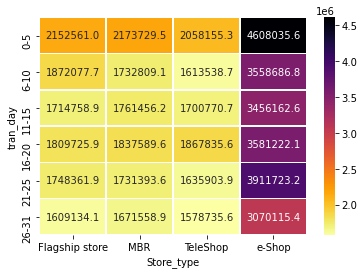

In [748]:

sns.heatmap(b1, annot=True, linewidths=.5,cmap='inferno_r', fmt='.1f')

In [749]:
bins=[0,2011, 2012, 2013, 2014]
y['tran_year']=pd.cut(y['tran_year'], bins,labels=['2011','2012', '2013', '2014'])
c1=pd.pivot_table(y, values='total_amt', index='tran_year', columns='prod_cat', aggfunc=np.sum)

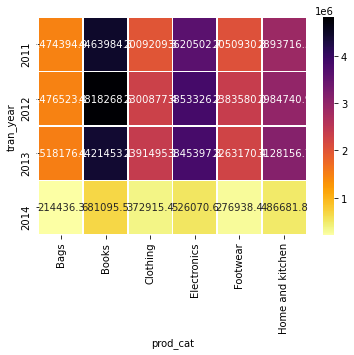

In [750]:
sns.heatmap(c1, annot=True, linewidths=.5,cmap='inferno_r', fmt='.1f')

In [751]:
bins=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
y['tran_month']=pd.cut(y['tran_month'], bins,labels=['jan','feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
d1=pd.pivot_table(y, values='total_amt', index='tran_month', columns='Gender', aggfunc=np.sum)

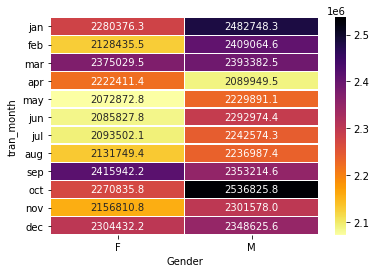

In [752]:
sns.heatmap(d1, annot=True, linewidths=.5,cmap='inferno_r', fmt='.1f')

In [753]:
Final['tran_month'].dtypes

dtype('int64')

In [755]:
f=Final.copy(deep=False)

In [756]:
f

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,tran_year,tran_month,tran_day,Cust_dob_year
0,268408,1970-02-01,M,4.0,8.724384e+10,2014-01-13,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction,2014,1,13,1970
1,268408,1970-02-01,M,4.0,1.619787e+10,2013-12-16,1.0,4.0,5.0,210.0,110.250,1160.250,Flagship store,Bags,Mens,2013,12,16,1970
3,268408,1970-02-01,M,4.0,2.881014e+10,2013-02-09,10.0,6.0,2.0,813.0,170.730,1796.730,TeleShop,Home and kitchen,Kitchen,2013,2,9,1970
4,268408,1970-02-01,M,4.0,6.463344e+10,2013-06-05,4.0,2.0,3.0,312.0,98.280,1034.280,Flagship store,Footwear,Kids,2013,6,5,1970
5,268408,1970-02-01,M,4.0,5.690286e+10,2013-01-30,9.0,3.0,5.0,868.0,455.700,4795.700,e-Shop,Electronics,Cameras,2013,1,30,1970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23189,269626,1992-12-27,F,5.0,7.136903e+10,2011-10-18,12.0,6.0,1.0,638.0,66.990,704.990,e-Shop,Home and kitchen,Tools,2011,10,18,1992
23190,269626,1992-12-27,F,5.0,9.413405e+10,2011-07-07,3.0,1.0,3.0,1078.0,339.570,3573.570,MBR,Clothing,Kids,2011,7,7,1992
23191,274308,1992-12-29,F,5.0,2.620869e+10,2012-10-22,1.0,2.0,2.0,898.0,188.580,1984.580,MBR,Footwear,Mens,2012,10,22,1992
23192,274308,1992-12-29,F,5.0,5.735882e+10,2012-05-09,1.0,2.0,4.0,876.0,367.920,3871.920,e-Shop,Footwear,Mens,2012,5,9,1992


In [757]:
bins=[0, 1976, 1982, 1988, 1992]
f['Cust_dob_year']=pd.cut(f['Cust_dob_year'], bins,labels=['38+','32-38', '32-26', '22-26'])
g1=pd.pivot_table(f, values='Qty', index='Cust_dob_year', columns='prod_cat', aggfunc=np.sum)
g1

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Cust_dob_year,,,,,,
38+,1675.0,5109.0,2321.0,4152.0,2433.0,3287.0
32-38,1413.0,4282.0,2138.0,3463.0,2222.0,3128.0
32-26,1323.0,4235.0,2164.0,3613.0,2050.0,2813.0
22-26,939.0,2784.0,1445.0,2332.0,1424.0,1960.0


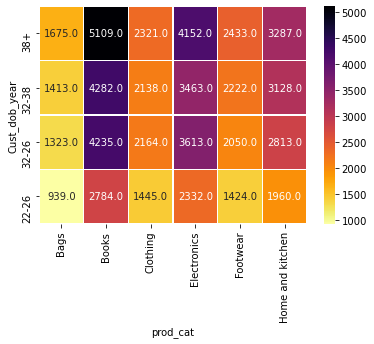

In [758]:
sns.heatmap(g1, annot=True, linewidths=.5,cmap='inferno_r', fmt='.1f')

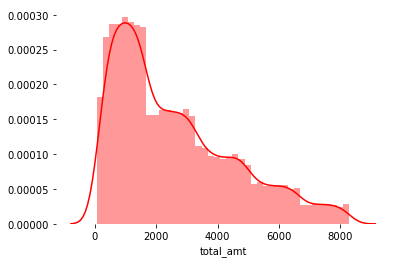

In [759]:
sns.distplot(Final['total_amt'],color="red");
sns.despine(left=True, bottom=True)

In [760]:
prod_sales = pd.DataFrame(hello.groupby('prod_subcat').sum()['Qty'])

prod_sales.sort_values(by=['Qty'], inplace=True, ascending=False)

top_prods = prod_sales.head(10)

top_prods

,Qty
prod_subcat,
Women,8188.0
Mens,7864.0
Kids,5495.0
Tools,2885.0
Fiction,2871.0
Mobiles,2854.0
Children,2798.0
Kitchen,2781.0
Comics,2771.0


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

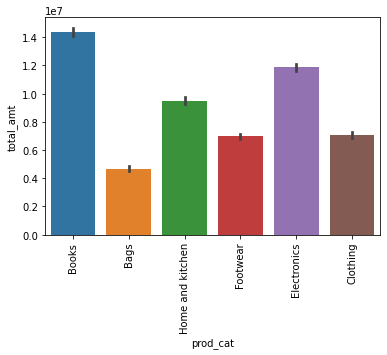

In [761]:
sns.barplot(x='prod_cat',y='total_amt',data=Final,estimator=sum);
plt.xticks(rotation=90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 <a list of 18 Text major ticklabel objects>)

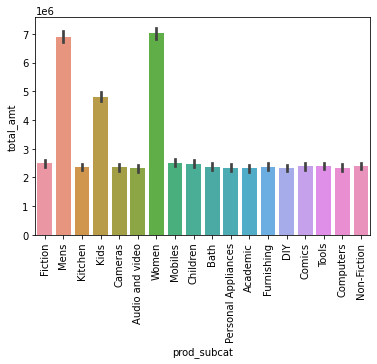

In [762]:
sns.barplot(x='prod_subcat',y='total_amt',data=Final,estimator=sum);
plt.xticks(rotation=90)

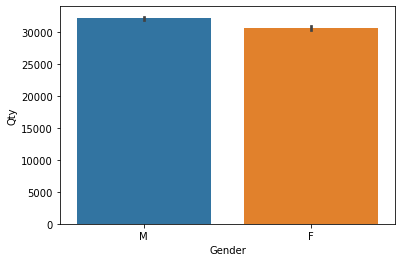

In [763]:
sns.barplot(x='Gender',y='Qty',data=Final,estimator=sum);

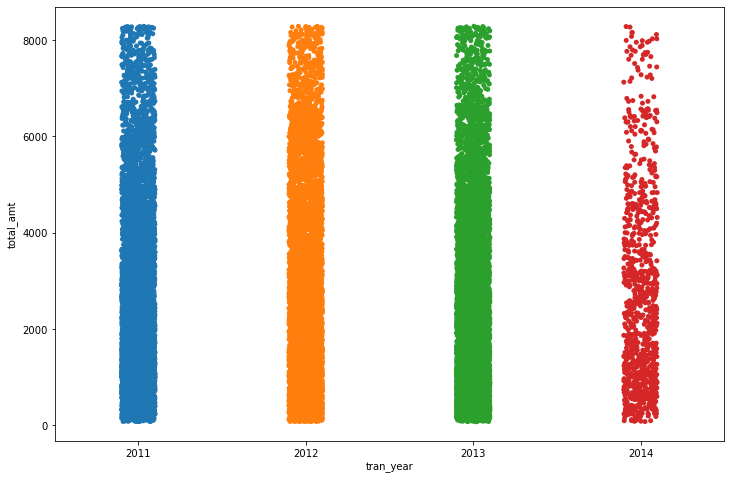

In [764]:
plt.figure(figsize=(12,8))
sns.stripplot(x="tran_year", y="total_amt", data=Final)